In [2]:
import numpy as np
from matplotlib import pyplot as plt
import io
from PIL import Image
import os

In [3]:
os.getcwd()
os.chdir('/Users/alim/Documents/ECE637/hw1/C-code/bin')
im = Image.open('img03.tif')
plt.show()

[0.         0.8975979  1.7951958  2.6927937  3.5903916  4.48798951
 5.38558741 6.28318531]
[ 1.          0.6234898  -0.22252093 -0.90096887 -0.90096887 -0.22252093
  0.6234898 ]
[-2.22044605e-16+0.00000000e+00j  3.50000000e+00-4.65309403e-16j
  2.22044605e-16-2.12925154e-17j  1.11022302e-16-9.27863951e-18j
  1.11022302e-16+9.27863951e-18j  2.22044605e-16+2.12925154e-17j
  3.50000000e+00+4.65309403e-16j]
[2.22044605e-16 3.50000000e+00 2.23063170e-16 1.11409357e-16
 1.11409357e-16 2.23063170e-16 3.50000000e+00]


<StemContainer object of 3 artists>

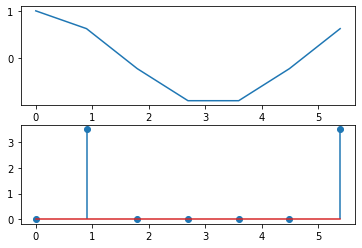

In [44]:
#create a 1 d signal:
start = 0
stop = 2 * np.pi
x = np.linspace(start, stop, num=8)
print(x)

xt = np.cos(x[0: -1])
print(xt)
fig, ax = plt.subplots(2)
ax[0].plot(x[0:-1], xt)

#do 1-d fft:
Xf = np.fft.fft(xt)
print(Xf)

print(np.abs(Xf))
ax[1].stem(x[0:-1], np.abs(Xf))

Text(0.5, 0.92, '|H(e^ju, e^jv)| - Problem 3')

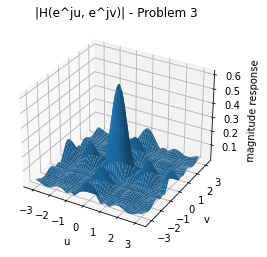

In [85]:
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import matplotlib.cm as cm

u = np.linspace(-np.pi, np.pi, 200)
v = np.linspace(-np.pi,np.pi, 200)

def H(u, v):
    return np.abs(1/81 * 2 * (1 + np.cos(u) + np.cos(2*u) + np.cos(3*u) + np.cos(4 * u)) * (1 + np.cos(v) + np.cos(2*v) + np.cos(3*v) + np.cos(4 * v)))




X, Y = np.meshgrid(u, v) 
mag = H(X, Y)


fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, mag)

ax.set_xlabel('u')
ax.set_ylabel('v')
ax.set_zlabel('magnitude response')
ax.set_title('|H(e^ju, e^jv)| - Problem 3')



Text(0.5, 0.92, '|H(e^ju, e^jv)| Problem 4')

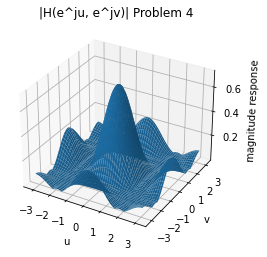

In [86]:
u = np.linspace(-np.pi, np.pi, 200)
v = np.linspace(-np.pi,np.pi, 200)

def H(u, v):
    return np.abs(1/25 * 2 * (1 + np.cos(u) + np.cos(2*u)) * (1 + np.cos(v) + np.cos(2*v)))




X, Y = np.meshgrid(u, v) 
mag = H(X, Y)


fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, mag)
ax.set_xlabel('u')
ax.set_ylabel('v')
ax.set_zlabel('magnitude response')
ax.set_title('|H(e^ju, e^jv)| Problem 4')

Text(0.5, 0.92, '|G(e^ju, e^jv)|')

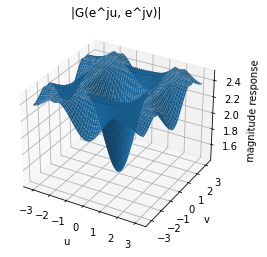

In [87]:
u = np.linspace(-np.pi, np.pi, 200)
v = np.linspace(-np.pi,np.pi, 200)

def G(u, v, lambda_):
    return (1 + lambda_ - lambda_*H(u,v))

lambda_ = 1.5
X, Y = np.meshgrid(u, v) 
mag = G(X, Y, lambda_)


fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, mag) 

ax.set_xlabel('u')
ax.set_ylabel('v')
ax.set_zlabel('magnitude response')
ax.set_title('|G(e^ju, e^jv)|')

Text(0.5, 0.92, '|H(e^ju, e^jv)|')

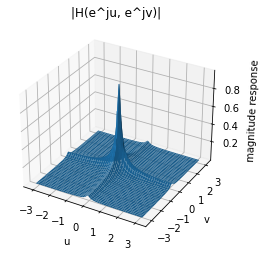

In [88]:
u = np.linspace(-np.pi, np.pi, 200)
v = np.linspace(-np.pi,np.pi, 200)

def H(u, v):
    return np.abs(0.01 / (1 - 0.9 * (np.exp(-1j * u) + np.exp(-1j*v)) + 0.81*(np.exp(-1j*u)*np.exp(-1j*v))))

X, Y = np.meshgrid(u, v) 
mag = H(X, Y)


fig = plt.figure()
ax = plt.axes(projection='3d')
#ax.contour(X, Y, mag, 30, cmap='hot') this is for a contour plot
ax.plot_surface(X, Y, mag)
ax.set_xlabel('u')
ax.set_ylabel('v')
ax.set_zlabel('magnitude response')
ax.set_title('|H(e^ju, e^jv)|')

[[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 7.51021827e-10
  6.75919644e-10 6.08327680e-10]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 6.75919644e-10
  6.08327680e-10 5.47494912e-10]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 6.08327680e-10
  5.47494912e-10 4.92745421e-10]]


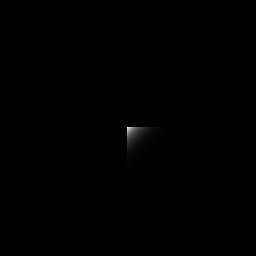

/Users/alim/Documents/ECE637/hw1/C-code/bin


In [75]:
#compute the PSF by appplying difference equation to a 256 x 256 image where x(m,n) = deltafunc(m-127, n-127)
#remember, deltafunc(n) means 1 at 0, 0 everywhere else. So, deltafunc(m-127, n-127) means 1 at 127, 127. This 
#is a corner of an image if we have a 256 by 256 image (i.e, we go from 0 to 255 in the index)

rows_x = 256
cols_y = 256
delta_func_out = 1

arr = np.zeros((rows_x,cols_y))
for x in range(0,rows_x):
    for y in range(0, cols_y):
        if (x == 127) and (y == 127): #condition for delta function
            arr[x,y] = 0.01 * delta_func_out
        if (x == 127) and (y > 127):
            arr[x,y] =  0.9 * arr[x, y-1]
        if (x > 127) and (y ==127):
            arr[x, y] = 0.9 * arr[x-1, y]
        if (x > 127 ) and (y > 127):
            arr[x,y] = 0.9 * (arr[x-1, y] + arr[x, y-1]) - 0.81 * arr[x-1, y-1]


            
print(arr * 255 * 100)
im_save = Image.fromarray((255 * 100 * arr).astype(np.uint8))
im_save.save('im_save.tif')
display(im_save)
import os
print(os.getcwd())
    
